<a href="https://colab.research.google.com/github/Aravindsys/GRIP/blob/master/TSF_Internship_Sample_Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import io

In [17]:
from google.colab import files 
uploaded = files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


**Getting the SampleSuperstore Dataset**


In [19]:
df = pd.read_csv(io.BytesIO(uploaded['SampleSuperstore.csv'])) 

           Ship Mode    Segment        Country  ... Quantity Discount    Profit
0       Second Class   Consumer  United States  ...        2     0.00   41.9136
1       Second Class   Consumer  United States  ...        3     0.00  219.5820
2       Second Class  Corporate  United States  ...        2     0.00    6.8714
3     Standard Class   Consumer  United States  ...        5     0.45 -383.0310
4     Standard Class   Consumer  United States  ...        2     0.20    2.5164
...              ...        ...            ...  ...      ...      ...       ...
9989    Second Class   Consumer  United States  ...        3     0.20    4.1028
9990  Standard Class   Consumer  United States  ...        2     0.00   15.6332
9991  Standard Class   Consumer  United States  ...        2     0.20   19.3932
9992  Standard Class   Consumer  United States  ...        4     0.00   13.3200
9993    Second Class   Consumer  United States  ...        2     0.00   72.9480

[9994 rows x 13 columns]


**Fetching the First 5 records**

In [20]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**To get the count of unique values in the dataset**

In [36]:
df.nunique(axis=0)

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**To get the Data type of the fields**

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


**Country field is of no use. So dropping it**

In [41]:
dfWithoutCountry = df.drop(columns='Country')

In [42]:
dfWithoutCountry.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Checking to see any null values exists**

In [45]:
dfWithoutCountry.isnull().sum() 

Ship Mode       0
Segment         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**Grouping Fields and analyzing**

In [48]:
df.groupby('Ship Mode')['Profit'].mean()

Ship Mode
First Class       31.839948
Same Day          29.266591
Second Class      29.535545
Standard Class    27.494770
Name: Profit, dtype: float64

In [65]:
print(df.groupby('Segment')['Profit'].sum())
print(df.groupby('Segment')['Profit'].mean())    

Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64
Segment
Consumer       25.836873
Corporate      30.456667
Home Office    33.818664
Name: Profit, dtype: float64


In [67]:
print(df.groupby('Category')['Profit'].sum())
print(df.groupby('Category')['Profit'].mean())  

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64
Category
Furniture           8.699327
Office Supplies    20.327050
Technology         78.752002
Name: Profit, dtype: float64


In [71]:
print(df.groupby(['Category','Sub-Category'])['Profit'].sum())
print(df.groupby(['Category','Sub-Category'])['Profit'].mean())

Category         Sub-Category
Furniture        Bookcases       -3472.5560
                 Chairs          26590.1663
                 Furnishings     13059.1436
                 Tables         -17725.4811
Office Supplies  Appliances      18138.0054
                 Art              6527.7870
                 Binders         30221.7633
                 Envelopes        6964.1767
                 Fasteners         949.5182
                 Labels           5546.2540
                 Paper           34053.5693
                 Storage         21278.8264
                 Supplies        -1189.0995
Technology       Accessories     41936.6357
                 Copiers         55617.8249
                 Machines         3384.7569
                 Phones          44515.7306
Name: Profit, dtype: float64
Category         Sub-Category
Furniture        Bookcases       -15.230509
                 Chairs           43.095894
                 Furnishings      13.645918
                 Tables        

In [73]:
print(df.groupby(['Category','Sub-Category'])['Profit','Discount'].mean())

                                  Profit  Discount
Category        Sub-Category                      
Furniture       Bookcases     -15.230509  0.211140
                Chairs         43.095894  0.170178
                Furnishings    13.645918  0.138349
                Tables        -55.565771  0.261285
Office Supplies Appliances     38.922758  0.166524
                Art             8.200737  0.074874
                Binders        19.843574  0.372292
                Envelopes      27.418019  0.080315
                Fasteners       4.375660  0.082028
                Labels         15.236962  0.068681
                Paper          24.856620  0.074891
                Storage        25.152277  0.074704
                Supplies       -6.258418  0.076842
Technology      Accessories    54.111788  0.078452
                Copiers       817.909190  0.161765
                Machines       29.432669  0.306087
                Phones         50.073938  0.154556


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [75]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


**Data Visualization**

In [76]:
import matplotlib.pyplot as plt


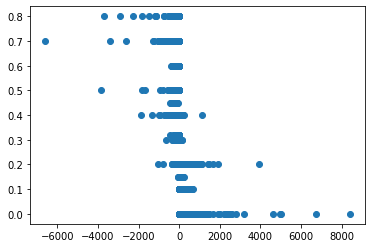

In [79]:
plt.scatter(df['Profit'],df['Discount'])

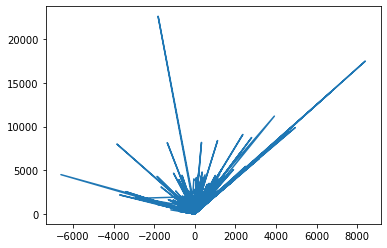

In [105]:
plt.plot(df['Profit'],df['Sales'])

In [106]:
import seaborn as sns

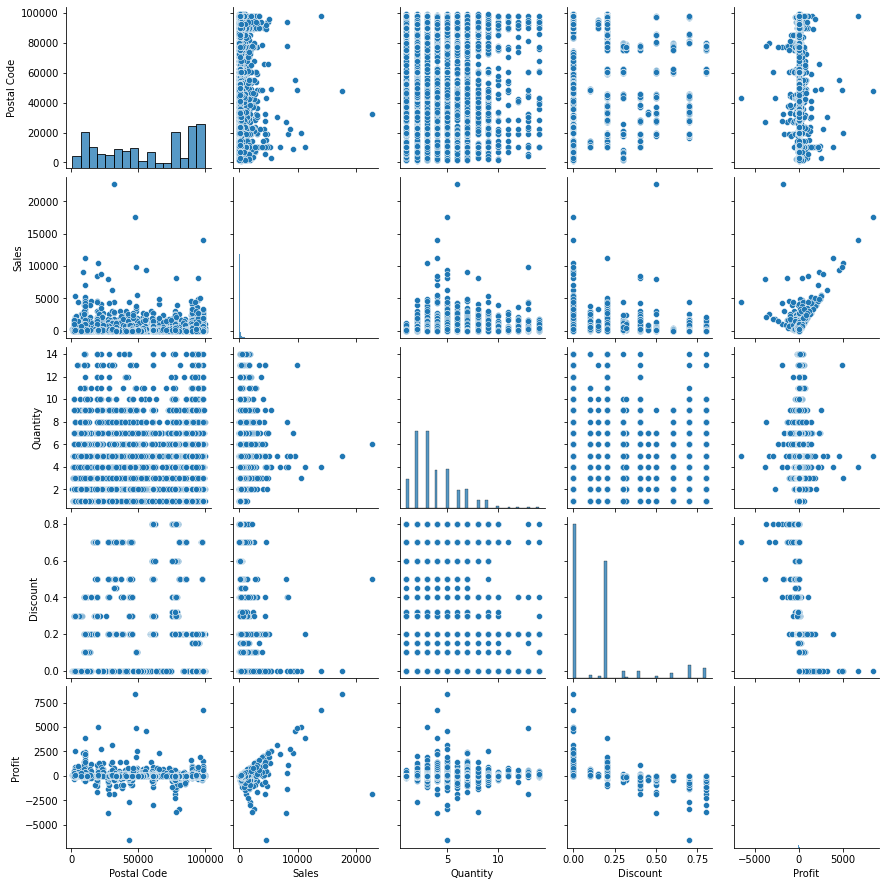

In [107]:
sns.pairplot(data=df)

In [113]:
import numpy as np
df_pivot = pd.pivot_table(
	df,
	values="Profit",
	index="Ship Mode",
	columns="Segment",
	aggfunc=np.mean
)

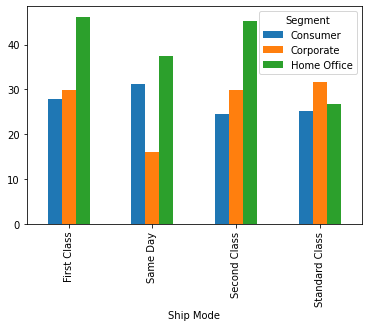

In [114]:
ax = df_pivot.plot(kind="bar")


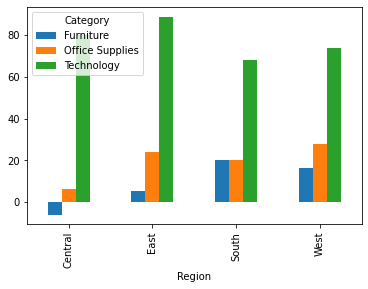

In [115]:
df_RegionCategory = pd.pivot_table(
	df,
	values="Profit",
	index="Region",
	columns="Category",
	aggfunc=np.mean
)
axRegion = df_RegionCategory.plot(kind="bar")

**Encoding the Labels for the Linear Model**

In [121]:
from sklearn.preprocessing import LabelEncoder


In [126]:
columns_to_encode = ['Ship Mode','Segment','State','Postal Code','Region',
                     'Category','Sub-Category']

In [129]:
le = LabelEncoder()
for i in columns_to_encode:
  dfWithoutCountry[i+'_c'] = le.fit_transform(dfWithoutCountry[i].astype(str))

In [131]:
dfWithoutCountry['City_c'] = le.fit_transform(dfWithoutCountry['City'].astype(str))

**Making sure that our Encoded values are added to the Data frame**

In [135]:
dfWithoutCountry.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Ship Mode_c,Segment_c,State_c,Postal Code_c,Region_c,Category_c,Sub-Category_c,City_c
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,2,0,15,187,2,0,4,194
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,2,0,15,187,2,0,5,194
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,2,1,3,517,3,1,10,266
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,3,0,8,138,2,0,16,153
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,3,0,8,138,2,1,14,153


In [149]:
dfWithoutCountry.loc[dfWithoutCountry.Segment == 'Corporate', ['Segment_c']].iloc[0]

Segment_c    1
Name: 2, dtype: int64

**Preparing the Dependent and Independent variables from the Dataset**

In [153]:
datax = dfWithoutCountry.loc[:,'Sales':].drop(columns='Profit')

In [155]:
datay = dfWithoutCountry.loc[:,'Profit']

In [163]:
print(datax.shape)
print(datay.shape)

(9994, 11)
(9994,)


**Building The Linear Model**

In [164]:
from sklearn.linear_model import LinearRegression

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
trainx,testx,trainy,testy = train_test_split(datax,datay,test_size=0.20,random_state=0)

In [167]:
linear_model = LinearRegression()

In [168]:
linear_model.fit(trainx,trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Model Accuracy**

In [176]:
print('Coefficients: \n', linear_model.coef_)
print('Variance score: %.2f' % linear_model.score(testx, testy))
mae = mean_absolute_error(testy,linear_model.predict(testx), multioutput='uniform_average')
print('Mean Absolute Error: '+str(mae))

Coefficients: 
 [ 1.54877835e-01 -2.11087157e+00 -2.44658110e+02 -3.04349571e+00
  1.64869189e+00 -1.79337714e-02  4.78588489e-03 -3.73154236e+00
  1.86782532e+01 -3.73420411e+00 -2.61210338e-02]
Variance score: 0.36
Mean Absolute Error: 62.42115854880284


In [171]:
from sklearn.metrics import mean_absolute_error

In [182]:
min = dfWithoutCountry['Profit'].min()
max = dfWithoutCountry['Profit'].max()
print("Range of product: "+str(min)+" to "+str(max))

Range of product: -6599.978 to 8399.976
